Integrantes:

- Rodrigo Mansilla - 22611
- Sergio Orellana - 221122
- Carlos Valladares -- 221164


### Práctica - Ejercicio 1


## Notación Matemática y Explicación
### Ecuación de Acumulación de Stock
$$\frac{dS}{dt} = \text{Entradas}(t) - \text{Salidas}(t)$$

Donde:
- $S$ es el stock.
- $t$ es el tiempo.
- Entradas(t) y Salidas(t) son flujos.

### Análisis Dimensional de Tasa de Flujo
Si un flujo tiene unidades de personas/mes y un stock tiene unidades de personas, entonces:
$$[Flujo] = \frac{[Stock]}{[Tiempo]}$$
Por ejemplo: $\frac{\text{personas}}{\text{mes}}$.

### Solución de Decaimiento Exponencial
$$S(t) = S_0 e^{-\alpha t}$$
Donde:
- $S_0$ es el stock inicial.
- $\alpha$ es la tasa de salida (decaimiento).
- $t$ es el tiempo.
Se usa para modelar procesos de pérdida constante, como mortalidad o desintegración.


## Comparaciones
### Modelado de Tiempo Continuo vs Discreto
- **Continuo:** Cambio a lo largo del tiempo sin interrupciones, usa ecuaciones diferenciales.
- **Discreto:** Cambio en pasos finitos (p.ej. cada día o mes), se modela con iteraciones o ecuaciones en diferencias.

### Retroalimentación Balanceada vs Reforzada
- **Balanceada:** Estabiliza el sistema, resiste el cambio (p.ej. termostato).
- **Reforzada:** Amplifica cambios, lleva al crecimiento o colapso (p.ej. intereses compuestos).

## Constante de Tiempo $\tau$ en Decaimiento Exponencial
La constante de tiempo $\tau = \frac{1}{\alpha}$ indica el tiempo requerido para que el stock se reduzca aproximadamente al 37% de su valor original.

**Ejemplo:** Si $\alpha = 0.1\,\text{mes}^{-1}$, entonces $\tau = 10\,$meses.
En farmacología, $\tau$ puede representar el tiempo para eliminar una droga del cuerpo.


   Tiempo (meses)  Solución Euler  Solución Exacta  Error Absoluto
0             0.0      1000.00000      1000.000000        0.000000
1             0.1       990.00000       990.049834        0.049834
2             0.2       980.10000       980.198673        0.098673
3             0.3       970.29900       970.445534        0.146534
4             0.4       960.59601       960.789439        0.193429


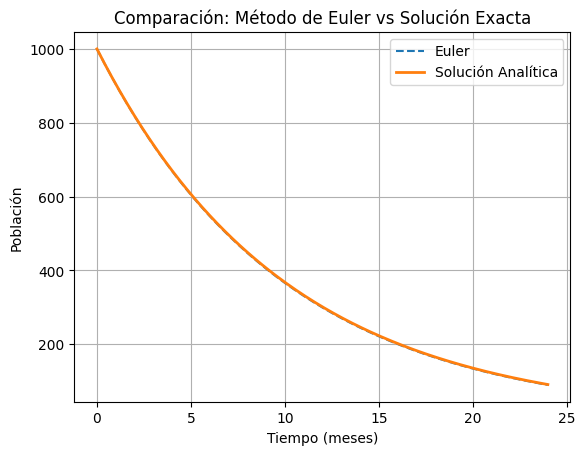

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del modelo
S0 = 1000  # Población inicial
alpha = 0.1  # Tasa de mortalidad (mes^-1)
dt = 0.1  # Paso de integración (meses)
T = 24  # Horizonte de tiempo (meses)
N = int(T / dt)  # Número de pasos

# Tiempo
t = np.linspace(0, T, N + 1)

# Inicialización de arrays
S_euler = np.zeros(N + 1)
S_exact = np.zeros(N + 1)

# Condición inicial
S_euler[0] = S0
S_exact[0] = S0

# Simulación por Euler
for i in range(N):
    dS = -alpha * S_euler[i]
    S_euler[i + 1] = S_euler[i] + dS * dt
    S_exact[i + 1] = S0 * np.exp(-alpha * t[i + 1])

# Mostrar datos en tabla
df = pd.DataFrame(
    {
        "Tiempo (meses)": t,
        "Solución Euler": S_euler,
        "Solución Exacta": S_exact,
        "Error Absoluto": np.abs(S_euler - S_exact),
    }
)

# Mostrar primeras filas como muestra
print(df.head())

# Gráfica
plt.plot(t, S_euler, label="Euler", linestyle="--")
plt.plot(t, S_exact, label="Solución Analítica", linewidth=2)
plt.xlabel("Tiempo (meses)")
plt.ylabel("Población")
plt.title("Comparación: Método de Euler vs Solución Exacta")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 2 - Bucles de retroalimentación y dinámica no lineal

1. **Describa cómo los bucles de retroalimentación crean:**
   a. **Crecimiento exponencial (bucle de refuerzo)**

   Un bucle de refuerzo (positivo) devuelve la señal con la misma polaridad: más stock → más flujo de entrada → aún más stock. Ejemplos clásicos son los intereses compuestos o la difusión boca-a-boca de una innovación. El resultado matemático es una ecuación diferencial $X = kX$ cuya solución es $X(t) = X_0e^{kt}$

   b. **Equilibrio (bucle de equilibrio)**

   Un bucle de equilibrio (negativo) compara el estado real con un objetivo y actúa para reducir la brecha. Al aumentar la variable, el flujo correctivo actúa en sentido contrario, ralentizando el cambio y llevando el sistema a un valor de referencia (termostato, depredador-presa, inventario). Esto suele producir curvas logísticas o fluctuaciones amortiguadas.

2. Analice el modelo epidémico SIR:
   a. **Etiquete todos los stocks/flujos del sistema.**

| Stock                         | Significado                           | Flujo de entrada | Flujo de salida               |
| ----------------------------- | ------------------------------------- | ---------------- | ----------------------------- |
| **S (Susceptibles)**          | Personas sanas que pueden infectarse  | —                | **Infección** $\beta\,S\,I/N$ |
| **I (Infectados)**            | Personas que transmiten la enfermedad | Infección        | **Recuperación** $\gamma\,I$  |
| **R (Recuperados/Retirados)** | Inmunes o fallecidos                  | Recuperación     | —                             |

b. **Identifique los bucles de retroalimentación que rigen la propagación de la infección.**

**R₁ – Bucle reforzante (contagio):** I ↑ → flujo de infección ↑ → I ↑. Responsable del arranque exponencial.

**B₂ – Bucle balanceador (agotamiento de susceptibles):** Infección ↓ S; un S menor disminuye el flujo de infección y frena el crecimiento de I.

**B₃ – Bucle balanceador (recuperación):** I ↑ → flujo de recuperación γ I ↑ → I ↓, acelerando la caída post-pico.

El juego entre R₁ y los dos bucles B genera la clásica curva epidémica: subida rápida, pico cuando B₂/B₃ igualan a R₁, y descenso.

3. Explique por qué los sistemas no lineales (p. ej., Flujo= βSI) requiere simulación numérica.

   1. Acoplamiento multiplicativo. El término 𝛽 𝑆 𝐼 hace que la derivada de S e I dependa de su producto, convirtiendo la ODE (Ordinary Differential Equation) en no lineal. Las técnicas lineales (superposición, transformadas de Laplace) dejan de aplicar.

   2. Pocas soluciones cerradas. Existen soluciones paramétricas o implícitas para casos simplificados del SIR, pero requieren integrar expresiones trascendentales numéricamente para obtener valores de t.

   3. Extensiones realistas eliminan cualquier atisbo de analiticidad. Añadir nacimientos, muertes, vacunación o β(t) variable genera sistemas sin solución exacta conocida.

   4. Herramientas estándar de integración. Métodos como Runge-Kutta de 4.º orden permiten aproximar la trayectoria con control del error global.

   5. Métodos de series o Taylor convergen localmente y siguen siendo computados paso a paso, reforzando la necesidad de software de simulación.

En suma, la no linealidad rompe la linealidad analítica; la simulación es la única vía práctica para pronosticar el curso de una epidemia o probar escenarios de intervención.


## Práctica


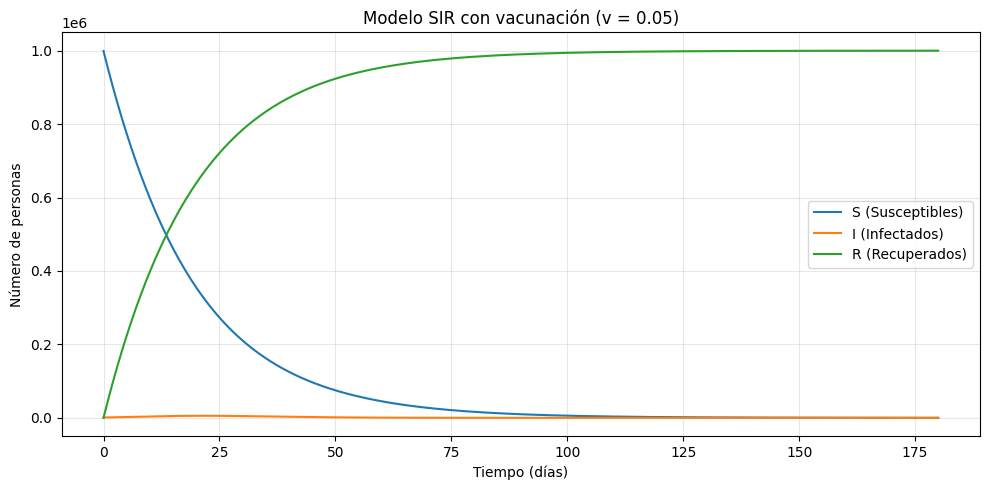

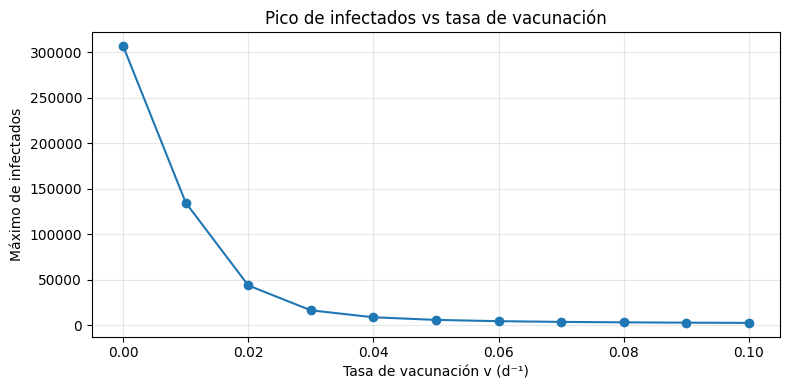

Impacto de v en el pico de infecciones:
  v = 0.00  →  Pico ≈   306,652  personas  (día  39.5)
  v = 0.01  →  Pico ≈   134,585  personas  (día  44.0)
  v = 0.02  →  Pico ≈    43,597  personas  (día  42.0)
  v = 0.03  →  Pico ≈    16,275  personas  (día  33.5)
  v = 0.04  →  Pico ≈     8,621  personas  (día  26.5)
  v = 0.05  →  Pico ≈     5,728  personas  (día  21.5)
  v = 0.06  →  Pico ≈     4,330  personas  (día  18.0)
  v = 0.07  →  Pico ≈     3,537  personas  (día  15.5)
  v = 0.08  →  Pico ≈     3,036  personas  (día  13.5)
  v = 0.09  →  Pico ≈     2,694  personas  (día  12.0)
  v = 0.10  →  Pico ≈     2,448  personas  (día  11.0)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

beta = 0.3  # tasa de infección
gamma = 0.1  # tasa de recuperación
v = 0.05  # tasa de vacunación (valor inicial)
N = 1_000_000  # población total (puedes ajustar)

dt = 0.5  # tamaño de paso (días)
days = 180  # duración de la simulación (días)
t = np.arange(0, days + dt, dt)  # número de pasos de tiempo


def sir_con_vacunacion(beta, gamma, v, S0, I0, R0, t, N):
    """Integra el sistema SIR con vacunación mediante Euler explícito."""
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)

    S[0], I[0], R[0] = S0, I0, R0

    for k in range(1, len(t)):
        infeccion = beta * S[k - 1] * I[k - 1] / N
        vacunacion = v * S[k - 1]
        recuperacion = gamma * I[k - 1]

        dS = -infeccion - vacunacion
        dI = infeccion - recuperacion
        dR = recuperacion + vacunacion

        S[k] = S[k - 1] + dS * dt
        I[k] = I[k - 1] + dI * dt
        R[k] = R[k - 1] + dR * dt

    return S, I, R


S0 = N - 1_000  # 1 000 susceptibles iniciales convertidos a infectados
I0 = 1_000
R0 = 0

S, I, R = sir_con_vacunacion(beta, gamma, v, S0, I0, R0, t, N)

plt.figure(figsize=(10, 5))
plt.plot(t, S, label="S (Susceptibles)")
plt.plot(t, I, label="I (Infectados)")
plt.plot(t, R, label="R (Recuperados)")
plt.title(f"Modelo SIR con vacunación (v = {v})")
plt.xlabel("Tiempo (días)")
plt.ylabel("Número de personas")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

v_vals = np.linspace(0.0, 0.1, 11)  # 0, 0.01, …, 0.10
picos_I = []
dias_pico_I = []

for vv in v_vals:
    _, I_temp, _ = sir_con_vacunacion(beta, gamma, vv, S0, I0, R0, t, N)
    picos_I.append(I_temp.max())
    dias_pico_I.append(t[I_temp.argmax()])

# --- Gráfica de pico de infecciones versus v ---
plt.figure(figsize=(8, 4))
plt.plot(v_vals, picos_I, marker="o")
plt.title("Pico de infectados vs tasa de vacunación")
plt.xlabel("Tasa de vacunación v (d⁻¹)")
plt.ylabel("Máximo de infectados")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Tabla rápida en consola ---
print("Impacto de v en el pico de infecciones:")
for vv, pico, dia in zip(v_vals, picos_I, dias_pico_I):
    print(f"  v = {vv:>4.2f}  →  Pico ≈ {pico:>9,.0f}  personas  (día {dia:>5.1f})")

Considere y responda:

- **¿Cómo altera la vacunación los ciclos de retroalimentación?**

En mi modelo siento que la vacuna actúa como un nuevo bucle de equilibrio que se engancha directamente al stock de susceptibles (S). Antes había:

- R₁ (Refuerzo): I ↑ → contagios ↑ → I ↑
- B₂ (Balance por agotamiento de S): contagios ↓ S → contagios ↓
- B₃ (Balance por recuperación): I ↑ → recuperaciones ↑ → I ↓
  La vacunación añade B₄: S ↑ → vacunación ↑ → S ↓ → contagios ↓. Este nuevo lazo:

Drena susceptibles sin que pasen por I, debilitando directamente a R₁.

Refuerza a B₂ y B₃ porque reduce la materia prima del brote y adelanta las recuperaciones (al mover gente a R).

Acelera la llegada al equilibrio: cuanto mayor es v, más rápido se anula el bucle reforzante y antes se aplana la curva.

En los gráficos que obtuve se ve claro: al pasar de v = 0 a v = 0.10 d⁻¹ el pico de infectados cae de ~3 × 10⁵ a apenas 2,5 × 10³, y el sistema se estabiliza mucho antes.

- **¿Cuál es el valor mínimo de v para prevenir un brote?**

Para que la epidemia no despegue necesito que el número reproductivo efectivo inicial sea menor que&nbsp;1:

$
R\_{\text{e}}(0)=\frac{\beta}{\gamma+v}\,\frac{S_0}{N} < 1
$

Suponiendo que al inicio $S_0 \approx N$ (la población es casi toda susceptible):

$
\frac{\beta}{\gamma+v} < 1
\;\;\Longrightarrow\;\;
\boxed{\,v_{\text{crítico}} = \beta-\gamma\,}
$

Entonces para mi modelo:

- **$beta = 0{,}3\;\text{d}^{-1}$**
- **$gamma = 0{,}1\;\text{d}^{-1}$**

$
v_{{crítico}} = 0{,}3 - 0{,}1 = 0{,}20\;\text{d}^{-1}
$

> Necesito vacunar al menos al 20 % de los susceptibles cada día —o lograr una inmunidad equivalente— para que el número reproductivo efectivo arranque por debajo de 1 y el brote epidémico jamás llegue a iniciarse.


### 1. Compare críticamente

a. **Método de Euler vs. Runge-Kutta para la integración**  
   i. **Estabilidad y tamaño de paso:**  
   - **Euler:** Región de estabilidad pequeña; con pasos grandes, la solución se vuelve inestable rápidamente.
   - **RK4:** Región de estabilidad mucho más amplia, permite usar pasos más grandes sin perder estabilidad.
   - En ambos, un paso demasiado grande provoca inestabilidad, pero RK4 es mucho más tolerante.

b. **Compensación entre precisión y coste computacional.**
   - **Euler:** Barato y simple, pero poco preciso; requiere pasos muy pequeños para bajo error.
   - **RK4:** Más costoso por paso (4 evaluaciones), pero mucho más preciso; permite menos pasos para el mismo error.
   - **Conclusión:** RK4 suele ser más eficiente cuando se requiere precisión, ya que reduce el número total de pasos necesarios.

---

### 2. Ciclos de retroalimentación

Los **retrasos en los ciclos de retroalimentación** (como retrasos en pruebas durante una epidemia) provocan que el sistema reaccione con información desactualizada. Esto puede causar oscilaciones, respuestas tardías o amplificadas, y dificultar la estabilización. Reducir los retrasos mejora la respuesta y el control del sistema.

---

### 3. Modelo de stock-flujo

a. **Modelo propuesto:**  
   - **Stock:** Camas UCI ocupadas.
   - **Flujos:**  
     - **Ingreso a UCI:** Pacientes admitidos.  
     - **Altas de UCI:** Pacientes dados de alta (recuperación o fallecimiento).

b. **Ecuación :**  
   \[
   \text{Camas UCI}_{t+1} = \text{Camas UCI}_t + \text{Ingresos}_t - \text{Altas}_t
   \]

---

### 4. Método de Euler

a. **Error local de truncamiento:**  
   - Es la diferencia entre la solución exacta y la aproximación en un solo paso, asumiendo punto inicial exacto. Proporcional a \( h^2 \).

b. **Ventajas:**  
   1. Simple de implementar.
   2. Computacionalmente barato (1 evaluación por paso).

   **Desventajas:**  
   1. Baja precisión (error global \( O(h) \)).
   2. Puede ser inestable con pasos grandes o problemas rígidos.

c. **Algoritmo:**  
**Pasos del algoritmo:**

1. **Definir los parámetros iniciales:**
   - Función \( f(t, y) \) (la derivada o el modelo del sistema)
   - Punto inicial \( t_0 \) y valor inicial \( y_0 \)
   - Tamaño de paso \( h \)
   - Número de pasos \( N \) o el intervalo final \( t_f \)

2. **Inicializar:**
   - \( t = t_0 \)
   - \( y = y_0 \)

3. **Iteración principal:**
   - Para \( n = 0, 1, \ldots, N-1 \):
     1. **Calcular la pendiente:**  
        \( k_1 = f(t_n, y_n) \)
     2. **Actualizar el valor de \( y \):**  
        \( y_{n+1} = y_n + h \cdot k_1 \)
     3. **Avanzar el tiempo:**  
        \( t_{n+1} = t_n + h \)
     4. **(Opcional) Guardar o mostrar los valores \( (t_{n+1}, y_{n+1}) \)**
   - Repetir hasta alcanzar el tiempo final deseado.

---

### 5. Método de Runge-Kutta (RK4)

a. **Algoritmo y cuatro pasos intermedios:**


#### **Pasos del algoritmo:**

1. **Definir los parámetros iniciales:**
   - Función \( f(t, y) \)
   - Punto inicial \( t_0 \), valor inicial \( y_0 \)
   - Tamaño de paso \( h \)
   - Número de pasos \( N \) o intervalo final \( t_f \)

2. **Inicializar:**
   - \( t = t_0 \)
   - \( y = y_0 \)

3. **Iteración principal (para cada paso \( n \)):**
   - Para \( n = 0, 1, ..., N-1 \):
     1. **Calcular las pendientes intermedias:**
        - \( k_1 = f(t_n, y_n) \)  
          (Pendiente al inicio del intervalo)
        - \( k_2 = f(t_n + \frac{h}{2},\ y_n + \frac{h}{2} k_1) \)  
          (Pendiente en el punto medio, usando \( k_1 \))
        - \( k_3 = f(t_n + \frac{h}{2},\ y_n + \frac{h}{2} k_2) \)  
          (Otra pendiente en el punto medio, usando \( k_2 \))
        - \( k_4 = f(t_n + h,\ y_n + h k_3) \)  
          (Pendiente al final del intervalo, usando \( k_3 \))
     2. **Actualizar el valor de \( y \):**
        \[
        y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
        \]
     3. **Avanzar el tiempo:**
        \[
        t_{n+1} = t_n + h
        \]
     4. **Guardar o mostrar los valores \( (t_{n+1}, y_{n+1}) \)**
   - Repetir hasta alcanzar el tiempo final .


b. **Error global vs. Euler:**  
   - **Euler:** Error global de orden 1 (\( O(h) \)).
   - **RK4:** Error global de orden 4 (\( O(h^4) \)). Mucho más preciso para el mismo paso.

c. **¿Cuándo usar RK4?**  
   - Cuando se requiere alta precisión sin usar muchos pasos pequeños.
   - El mayor costo por paso se compensa con menos pasos necesarios y menor error.


## Practica 

## Instrucciones

1. **Implemente ambos métodos para:**
   - a. Modelo de crecimiento logístico
   - b. Parámetros: `r = 0.1`, `K = 1000`, `x₀ = 10`
   - c. Horizonte de tiempo: 100 unidades

---

2. **Analice y compare:**
   - a. Error relativo en `t = 50` para `Δt = 1.0`
   - b. Threshold entre tiempo de cómputo y precisión
   - c. Estabilidad con `Δt` grandes (`> 5.0`)

---

3. **Considere y responda:**
   - a. ¿Qué método mantiene mejor la estabilidad?
   - b. ¿Cómo escala el error con `Δt` en cada método?
   - c. ¿Cuándo convendría elegir Euler en lugar de RK4?

---

## Uso de Gen AI (e.g., ChatGPT, DeepSeek, Copilot, etc):

- Está **permitido**:
  - i. Debuggear su código
  - ii. Optimizar la lógica del modelo
  - iii. Explicar conceptos matemáticos (e.g., ecuaciones diferenciales)
  - iv. Clarificar conceptos teóricos y empezar las primeras etapas del código
  - v. **Si utiliza Gen AI:**  
    - Debe colocar el **último prompt** que le dio la solución que necesitaba  
    - Explique **por qué ese prompt funcionó**  
    - Analice la solución presentada  
    - **Si no se encuentra el prompt con su explicación y la solución fue generada con Gen AI, la nota será cero.**

- **No está permitido:**
  - a. Copiar la solución completa de otros o de AI sin entenderla
  - b. Usar modelos pre-construidos de librerías (e.g., Mesa, PySD, etc)

### Crecimiento Logístico

$$ \frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right) $$

- N(t): Población en el tiempo t
- r: Tasa de crecimiento $0.1$
- K: Capacidad carrying $1000$
- N(0): Población inicial $10$




#### Euler

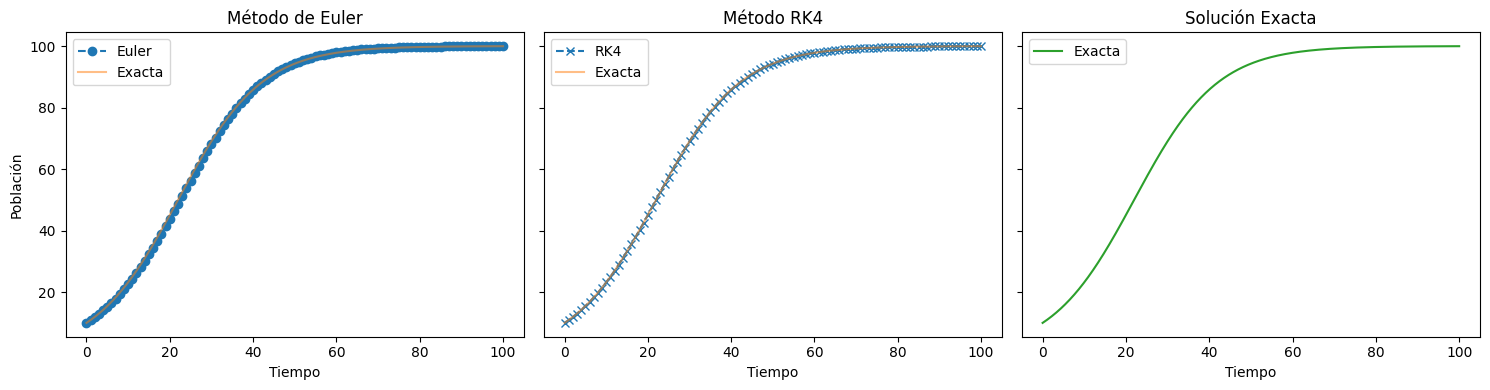

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
r = 0.1
K = 100
N0 = 10
t_max = 100

def logist(N, t):
    return r * N * (1 - N / K)

# Euler
def euler(f, N0, t_0, t_max, dt):
    steps = int((t_max - t_0) / dt)
    t = np.linspace(t_0, t_max, steps + 1)
    Nvals = np.zeros(steps + 1)
    Nvals[0] = N0
    for i in range(steps):
        Nvals[i + 1] = Nvals[i] + dt * f(Nvals[i], t[i])
    return t, Nvals

# RK4
def RK4(f, N0, t_0, t_max, dt):
    steps = int((t_max - t_0) / dt)
    t = np.linspace(t_0, t_max, steps + 1)
    Nvals = np.zeros(steps + 1)
    Nvals[0] = N0
    for i in range(steps):
        k1 = f(Nvals[i], t[i])
        k2 = f(Nvals[i] + 0.5 * dt * k1, t[i] + 0.5 * dt)
        k3 = f(Nvals[i] + 0.5 * dt * k2, t[i] + 0.5 * dt)
        k4 = f(Nvals[i] + dt * k3, t[i] + dt)
        Nvals[i + 1] = Nvals[i] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, Nvals

def exacta(t):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Simulación
dt = 1.0
t_euler, N_euler = euler(logist, N0, 0, t_max, dt)
t_rk4, N_rk4 = RK4(logist, N0, 0, t_max, dt)
t_exact = np.linspace(0, t_max, 1000)
N_exact = exacta(t_exact)

# Gráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axs[0].plot(t_euler, N_euler, 'o--', label='Euler')
axs[0].plot(t_exact, N_exact, '-', label='Exacta', alpha=0.5)
axs[0].set_title('Método de Euler')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Población')
axs[0].legend()

axs[1].plot(t_rk4, N_rk4, 'x--', label='RK4')
axs[1].plot(t_exact, N_exact, '-', label='Exacta', alpha=0.5)
axs[1].set_title('Método RK4')
axs[1].set_xlabel('Tiempo')
axs[1].legend()

axs[2].plot(t_exact, N_exact, '-', color='tab:green', label='Exacta')
axs[2].set_title('Solución Exacta')
axs[2].set_xlabel('Tiempo')
axs[2].legend()

plt.tight_layout()
plt.show()


#### Error relativo
- Se calcula en t= 50

In [24]:
idx_50 = np.where(t_euler == 50)[0][0]

e_50 = N_euler[idx_50]
rk4_50 = N_rk4[idx_50]
exact_50 = exacta(50)

# Errores relativos
err_rel_euler = np.abs(N_euler - exacta(t_euler)) / exacta(t_euler)
err_rel_rk4 = np.abs(N_rk4 - exacta(t_rk4)) / exacta(t_rk4)



idx_50 = np.where(t_euler == 50)[0][0]
print(f"Error relativo Euler en t=50: {error_euler[idx_50]:.4e}")
print(f"Error relativo RK4   en t=50: {error_rk4[idx_50]:.4e}")


Error relativo Euler en t=50: 1.5139e-03
Error relativo RK4   en t=50: 7.7157e-08


RK4 es varias órdenes de magnitud más preciso que Euler para el mismo paso.

#### Treshold

In [25]:
import time

dts = [0.1, 0.5, 1, 2, 5, 10]
for dt in dts:
    t0 = time.time()
    t_euler, N_euler = euler(logist, N0, 0, t_max, dt)
    t1 = time.time()
    t_rk4, N_rk4 = RK4(logist, N0, 0, t_max, dt)
    t2 = time.time()
    idx_50 = np.abs(t_euler - 50).argmin()
    exact_50 = exacta(t_euler[idx_50])
    error_euler = abs(N_euler[idx_50] - exact_50) / exact_50
    error_rk4 = abs(N_rk4[idx_50] - exact_50) / exact_50
    print(f"dt={dt:>4}: Error Euler={error_euler:.2e}, Error RK4={error_rk4:.2e}, Tiempo Euler={t1-t0:.4f}s, Tiempo RK4={t2-t1:.4f}s")


dt= 0.1: Error Euler=1.47e-04, Error RK4=7.58e-12, Tiempo Euler=0.0020s, Tiempo RK4=0.0040s
dt= 0.5: Error Euler=7.44e-04, Error RK4=4.77e-09, Tiempo Euler=0.0000s, Tiempo RK4=0.0010s
dt=   1: Error Euler=1.51e-03, Error RK4=7.72e-08, Tiempo Euler=0.0000s, Tiempo RK4=0.0010s
dt=   2: Error Euler=3.14e-03, Error RK4=1.26e-06, Tiempo Euler=0.0000s, Tiempo RK4=0.0000s
dt=   5: Error Euler=8.92e-03, Error RK4=5.34e-05, Tiempo Euler=0.0000s, Tiempo RK4=0.0000s
dt=  10: Error Euler=2.42e-02, Error RK4=1.02e-03, Tiempo Euler=0.0000s, Tiempo RK4=0.0000s


- Euler solo es preciso para Δt pequeños .

- RK4 mantiene errores bajos incluso con Δt=5–10, aunque a partir de $Δt≥10$ el error comienza a aumentar de forma apreciable.

- El tiempo de cómputo es bajo en ambos métodos, pero RK4 requiere más evaluaciones por paso.



#### Estabilidad con Δt grandes (>5.0)


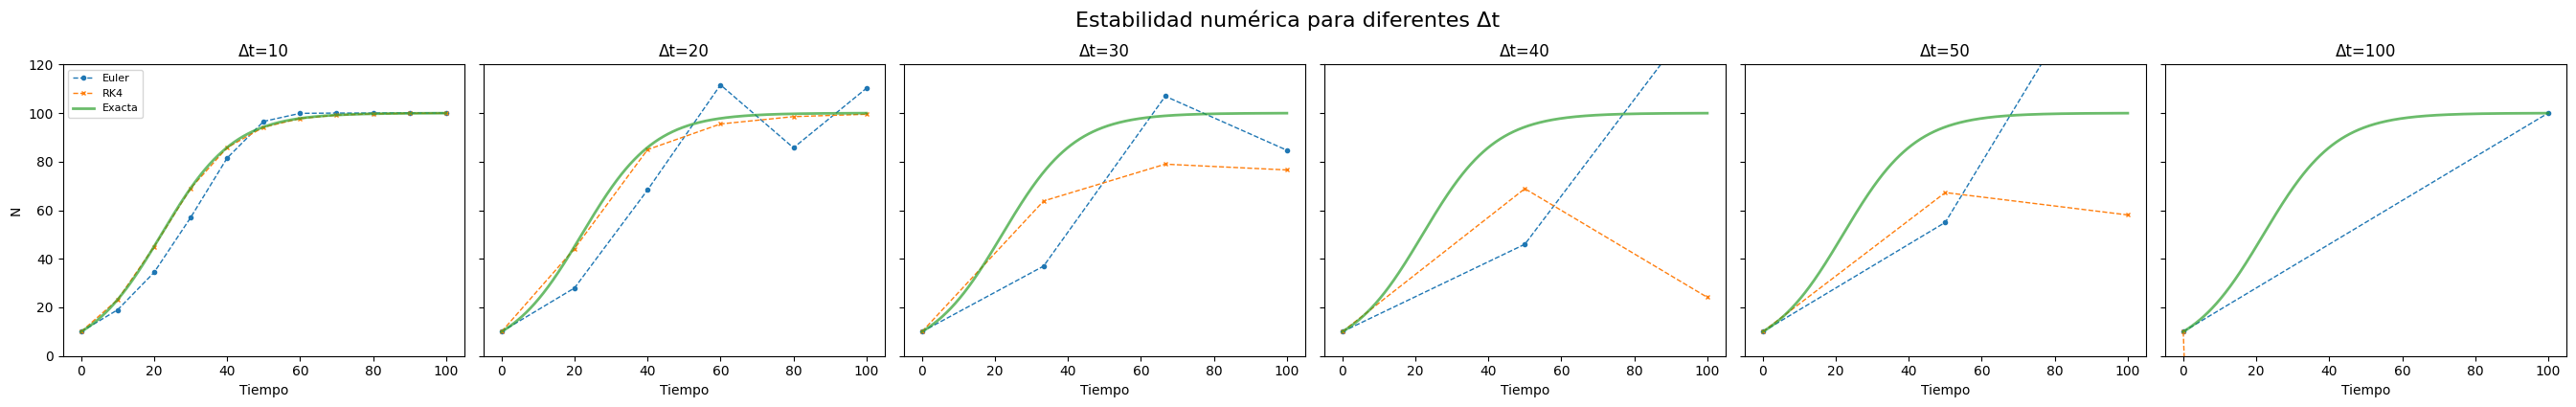

In [41]:
import matplotlib.pyplot as plt

dt_big = [10, 20, 30, 40, 50, 100]
t_exact = np.linspace(0, t_max, 1000)
N_exact = exacta(t_exact)

fig, axs = plt.subplots(1, len(dt_big), figsize=(4.5*len(dt_big), 4), sharey=True)

col_euler = 'tab:blue'
col_rk4 = 'tab:orange'
col_exact = 'tab:green'

for i, dt in enumerate(dt_big):
    t_euler, N_euler = euler(logist, N0, 0, t_max, dt)
    t_rk4, N_rk4 = RK4(logist, N0, 0, t_max, dt)
    
    axs[i].plot(t_euler, N_euler, 'o--', label=f'Euler', color=col_euler, markersize=3, linewidth=1)
    axs[i].plot(t_rk4, N_rk4, 'x--', label=f'RK4', color=col_rk4, markersize=3, linewidth=1)
    axs[i].plot(t_exact, N_exact, '-', label='Exacta', color=col_exact, alpha=0.7, linewidth=2)
    axs[i].set_xlabel('Tiempo')
    axs[i].set_title(f'Δt={dt}')

    axs[i].set_ylim(bottom=0, top=K*1.2)
    if i == 0:
        axs[i].set_ylabel('N')
        axs[i].legend(fontsize=8)

plt.tight_layout()
plt.suptitle("Estabilidad numérica para diferentes Δt", fontsize=16, y=1.05)
plt.show()


Mientras más tiempo pase, más se pierde la precisión de la medición. Pero Euler se vuelve inestable mucho antes que Runge-Kutta. 

Prompt utilizado

> Con las referencias bibliográficas adjuntas, implementemos el modelo de crecimiento logístico. No me des toda la implementación, dame una estructura paso a paso y desarrollemos en iteraciones. Quiero que primero aclares la ecuación y los parámetros, luego definamos las funciones básicas y después avancemos depurando el código y analizando los resultados, incluyendo el análisis del error relativo y la estabilidad numérica para diferentes métodos y tamaños de paso. Explícame los errores conceptuales o de código si los cometo.

#### Considere y responda:
a. ¿Qué método mantiene mejor la estabilidad?
- RK4 mantiene mejor la estabilidad que el método de Euler al usar pasos grandes. RK4  tolera valores de Δt mucho mayores antes de volverse inestables o producir soluciones erróneas y euler muestra oscilacionesa o divergencias mucho antes con pasos grandes.

b. ¿Cómo escala el error con Δt en cada método?
- Es proporcional a Δt^4 para RK4 y Δt para Euler. 

c. ¿Cuándo convendría elegir Euler en lugar de RK4?
- Se necesita una implementación  simple y  para problemas donde la precisión no es crítica como exploraciones iniciales.

- El tamaño de paso es necesariamente muy pequeño.


# Referencias

Introduction to Engineering Systems, ESD.00. (2011). https://ocw.mit.edu/courses/esd-00-introduction-to-engineering-systems-spring-2011/85603d5fc80f4c996a56b29e03460166_MITESD_00S11_lec03.pdf

Ecological feedback loops - complexity labs. (2017, 8 julio). Complexity Labs. https://www.complexitylabs.io/ecological-feedback-loops

Centers for Disease control and prevention [CDC]. (2015). THE NHSN STANDARDIZED INFECTION RATIO (SIR). https://www.cdc.gov/nhsn/pdfs/ps-analysis-resources/nhsn-sir-guide.pdf

Harko, T., Lobo, F. S., & Mak, M. (2014). Exact analytical solutions of the Susceptible-Infected-Recovered (SIR) epidemic model and of the SIR model with equal death and birth rates. Applied Mathematics And Computation, 236, 184-194. https://doi.org/10.1016/j.amc.2014.03.030

Tsai, T. (2014, 24 noviembre). RK4 Method for Solving SIR Model. https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model

Cano, J. A. S., & Sánchez–Cano, J. A. (2015b). MÉTODO DE LAS SERIES DE TAYLOR PARA RESOLVER ECUACIONES DIFERENCIALES LINEALES y NO LINEALES. www.academia.edu. https://www.academia.edu/19418531/M%C3%89TODO_DE_LAS_SERIES_DE_TAYLOR_PARA_RESOLVER_ECUACIONES_DIFERENCIALES_LINEALES_Y_NO_LINEALES


Computer Methods for Ordinary Differential Equations and Differential-Algebraic Equations
Hairer, E., & Wanner, G. (1996). Computer Methods for Ordinary Differential Equations and Differential-Algebraic Equations. Springer.

Numerical Analysis (5th Edition)
Burden, R. L., & Faires, J. D. (1993). Numerical Analysis (5th ed.). Brooks/Cole.

Business Dynamics: Systems Thinking and Modeling for a Complex World
Sterman, J. D. (2000). Business Dynamics: Systems Thinking and Modeling for a Complex World. Irwin/McGraw-Hill.

Elementary Differential Equations and Boundary Value Problems
Boyce, W. E., & DiPrima, R. C. (2005). Elementary Differential Equations and Boundary Value Problems (8th ed.). John Wiley & Sons.

Modeling and Simulation Fundamentals: Theoretical Underpinnings and Practical Domains
Sokolowski, J. A., & Banks, C. M. (Eds.). (2010). Modeling and Simulation Fundamentals: Theoretical Underpinnings and Practical Domains. Wiley.

A First Course in Differential Equations (3rd Edition)
Logan, J. D. (2006). A First Course in Differential Equations (3rd ed.). Springer.